In [2]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/sherli001/.conda/envs/singlecell/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] hgu219.db_3.2.3       org.Hs.eg.db_3.14.0   forcats_0.5.2        
 [4] stringr_1.5.0         dplyr_1.1.0           purrr_1.0.1          
 [7] readr_2.1.3           tidyr_1.3.0           tibble_3.1.7         
[10] ggplot2_3.3.6         tidyverse_1.3.2       AnnotationDbi_1.56.2 


In [1]:
library(WGCNA)
library(AnnotationDbi)
library(tidyverse)
library(ggplot2)
options(stringsAsFactors = FALSE)

library(hgu219.db)

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor


Warning message:
“package ‘AnnotationDbi’ was built under R version 4.1.3”
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


In [6]:
load(file = "./pairwise_RData_files/pairwise_WGCNA_ADNI_allSubjects-01-dataInput.RData")
load(file = "./pairwise_RData_files/20230418_CN_MCI_limmaCorrected-02-networkConstruction-stepByStep.RData")
load(file = "./pairwise_RData_files/datExpr_CN_MCI_limmaCorrected_selectHVGs.RData")

In [7]:
ls()

[1] "datExpr_CN_AD_selectHVGs"            "datExpr_CN_AD.gender_rin_corrected" 
 [3] "datExpr_CN_MCI_selectHVGs"           "datExpr_CN_MCI.gender_rin_corrected"
 [5] "datExpr_MCI_AD.gender_rin_corrected" "datTraits_CN_AD"                    
 [7] "datTraits_CN_MCI"                    "datTraits_MCI_AD"                   
 [9] "geneTree_CN_AD"                      "geneTree_CN_MCI"                    
[11] "MEs_CN_AD"                           "MEs_CN_MCI"                         
[13] "moduleColors_CN_AD"                  "moduleColors_CN_MCI"                
[15] "moduleLabels_CN_AD"                  "moduleLabels_CN_MCI"

## Quantifying module-trait associations

In [8]:
# Define numbers of genes and samples
nGenes_CN_MCI <- ncol(datExpr_CN_MCI_selectHVGs)
nSamples_CN_MCI <- nrow(datExpr_CN_MCI_selectHVGs)

# Recalculate MEs with color labels
MEs0_CN_MCI = moduleEigengenes(datExpr_CN_MCI_selectHVGs, moduleColors_CN_MCI)$eigengenes
MEs_CN_MCI = orderMEs(MEs0_CN_MCI)
moduleTraitCor_CN_MCI = cor(MEs_CN_MCI, datTraits_CN_MCI, use = "p");
moduleTraitPvalue_CN_MCI = corPvalueStudent(moduleTraitCor_CN_MCI, nSamples_CN_MCI);

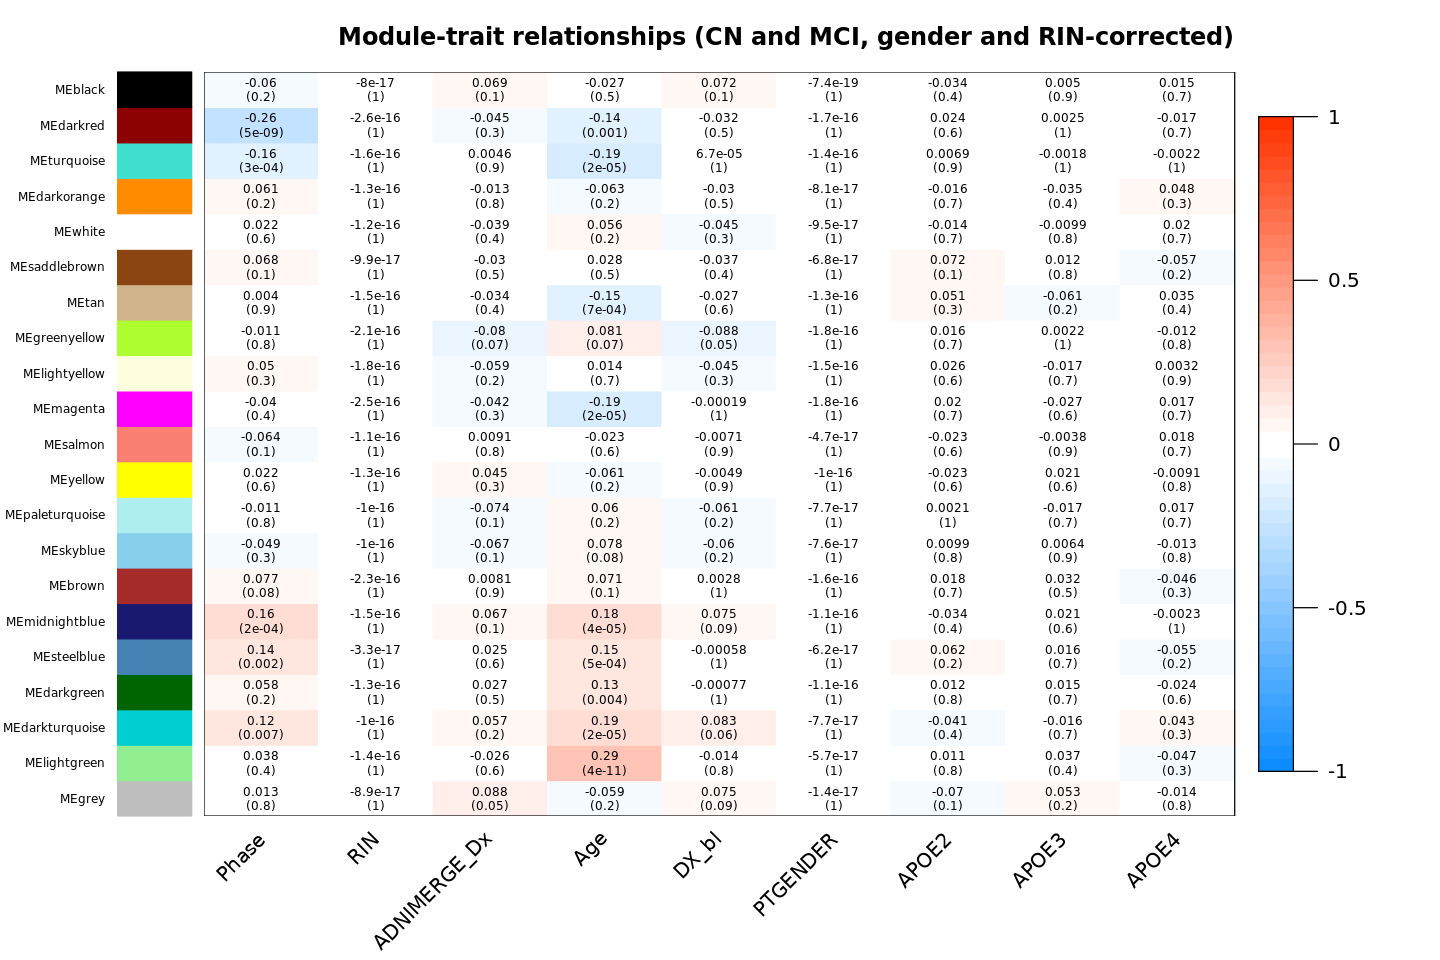

In [12]:
# sizeGrWindow(12,9)
options(repr.plot.width = 12, repr.plot.height = 8)
# Will display correlations and their p-values
textMatrix_CN_MCI = paste(signif(moduleTraitCor_CN_MCI, 2), "\n(",
                                        signif(moduleTraitPvalue_CN_MCI, 1), ")", sep = "");
dim(textMatrix_CN_MCI) = dim(moduleTraitCor_CN_MCI)
par(mar = c(6, 8.5, 3, 3));
# Display the correlation values within a heatmap plot
labeledHeatmap(Matrix = moduleTraitCor_CN_MCI,
               xLabels = names(datTraits_CN_MCI),
               yLabels = names(MEs_CN_MCI),
               ySymbols = names(MEs_CN_MCI),
               colorLabels = FALSE,
               colors = blueWhiteRed(50),
               textMatrix = textMatrix_CN_MCI,
               setStdMargins = FALSE,
               cex.text = 0.6,
               cex.lab.y = 0.6,
               zlim = c(-1,1),
               main = paste("Module-trait relationships (CN and MCI, gender and RIN-corrected)"))

In [11]:
pdf(file = "pairwise_plots/CN_MCI_moduleTraitCor.pdf", 
    width = 12, height = 9)

textMatrix_CN_MCI = paste(signif(moduleTraitCor_CN_MCI, 2), "\n(",
                                        signif(moduleTraitPvalue_CN_MCI, 1), ")", sep = "");
dim(textMatrix_CN_MCI) = dim(moduleTraitCor_CN_MCI)
par(mar = c(6, 8.5, 3, 3));
# Display the correlation values within a heatmap plot
labeledHeatmap(Matrix = moduleTraitCor_CN_MCI,
               xLabels = names(datTraits_CN_MCI),
               yLabels = names(MEs_CN_MCI),
               ySymbols = names(MEs_CN_MCI),
               colorLabels = FALSE,
               colors = blueWhiteRed(50),
               textMatrix = textMatrix_CN_MCI,
               setStdMargins = FALSE,
               cex.text = 0.6,
               cex.lab.y = 0.6,
               zlim = c(-1,1),
               main = paste("Module-trait relationships (CN and MCI, gender and RIN-corrected)"))

dev.off()

png 
  2

## Gene relationship to trait and important modules

In [13]:
# Define variable diagnosis containing diagnosis column of datTrait
diagnosis  <- as.data.frame(datTraits_CN_MCI$ADNIMERGE_Dx)
names(diagnosis) <- "diagnosis"

In [14]:
# names (colors) of the modules
modNames_CN_MCI = substring(names(MEs_CN_MCI), 3)
modNames_CN_MCI

[1] "black"         "darkred"       "turquoise"     "darkorange"   
 [5] "white"         "saddlebrown"   "tan"           "greenyellow"  
 [9] "lightyellow"   "magenta"       "salmon"        "yellow"       
[13] "paleturquoise" "skyblue"       "brown"         "midnightblue" 
[17] "steelblue"     "darkgreen"     "darkturquoise" "lightgreen"   
[21] "grey"

In [15]:
geneModuleMembership_CN_MCI <- as.data.frame(cor(datExpr_CN_MCI_selectHVGs, 
                                                MEs_CN_MCI, use = "p"))
MMPvalue_CN_MCI <- as.data.frame(corPvalueStudent(as.matrix(geneModuleMembership_CN_MCI), 
                                                 nSamples_CN_MCI))

names(geneModuleMembership_CN_MCI) = paste("MM", modNames_CN_MCI, sep="");
names(MMPvalue_CN_MCI) = paste("p.MM", modNames_CN_MCI, sep="");

In [16]:
geneTraitSignificance_CN_MCI.diagnosis = as.data.frame(cor(datExpr_CN_MCI_selectHVGs, diagnosis, use = "p"));

GSPvalue_CN_MCI.diagnosis = as.data.frame(
    corPvalueStudent(as.matrix(geneTraitSignificance_CN_MCI.diagnosis), nSamples_CN_MCI));

names(geneTraitSignificance_CN_MCI.diagnosis) = paste("GS.", names(diagnosis), sep="");
names(GSPvalue_CN_MCI.diagnosis) = paste("p.GS.", names(diagnosis), sep="");

In [17]:
# convert probe names to gene symbols
vector_datExpr_CN_MCI_geneSymbols <- rep(0, length = ncol(datExpr_CN_MCI_selectHVGs))

vector_datExpr_CN_MCI_geneSymbols <- AnnotationDbi::mapIds(hgu219.db,
                                                          keys = datExpr_CN_MCI_selectHVGs %>% colnames,
                                                          column = "SYMBOL",
                                                          keytype = "PROBEID",
                                                          multiVals = "first")

'select()' returned 1:many mapping between keys and columns



In [18]:
df_datExpr_CN_MCI_geneSymbols <- data.frame(vector_datExpr_CN_MCI_geneSymbols)
colnames(df_datExpr_CN_MCI_geneSymbols) <- c("geneSymbol")

df_datExpr_CN_MCI_geneSymbols %>% head

,geneSymbol
,<chr>
11756083_x_at,HLA-DQA1
11732801_at,SIRPB1
11755998_x_at,HLA-DRB4
11760799_x_at,HLA-DPB1
11732800_a_at,SIRPB1
11752660_a_at,SIRPB1


In [19]:
# Create the starting data frame
geneInfo0_CN_MCI_diagnosis = data.frame(geneProbe = rownames(df_datExpr_CN_MCI_geneSymbols),
                                       geneSymbol = df_datExpr_CN_MCI_geneSymbols$geneSymbol,
                                       moduleColor = moduleColors_CN_MCI,
                                       geneTraitSignificance_CN_MCI.diagnosis,
                                       GSPvalue_CN_MCI.diagnosis)

# Order modules by their significance for weight
modOrder_CN_MCI_diagnosis = order(-abs(cor(MEs_CN_MCI, diagnosis, use = "p")));
# Add module membership information in the chosen order
for (mod in 1:ncol(geneModuleMembership_CN_MCI))
{
    oldNames_diagnosis = names(geneInfo0_CN_MCI_diagnosis)
    geneInfo0_CN_MCI_diagnosis = data.frame(geneInfo0_CN_MCI_diagnosis, geneModuleMembership_CN_MCI[, modOrder_CN_MCI_diagnosis[mod]],
                                     MMPvalue_CN_MCI[, modOrder_CN_MCI_diagnosis[mod]]);
    names(geneInfo0_CN_MCI_diagnosis) = c(oldNames_diagnosis, paste("MM.", modNames_CN_MCI[modOrder_CN_MCI_diagnosis[mod]], sep=""),
                                   paste("p.MM.", modNames_CN_MCI[modOrder_CN_MCI_diagnosis[mod]], sep=""))
}
# Order the genes in the geneInfo variable first by module color, then by geneTraitSignificance
geneOrder_CN_MCI_diagnosis = order(geneInfo0_CN_MCI_diagnosis$moduleColor, -abs(geneInfo0_CN_MCI_diagnosis$GS.diagnosis));
geneInfo_CN_MCI_diagnosis = geneInfo0_CN_MCI_diagnosis[geneOrder_CN_MCI_diagnosis, ]

In [20]:
geneInfo_CN_MCI_diagnosis %>% head

,geneProbe,geneSymbol,moduleColor,GS.diagnosis,p.GS.diagnosis,MM.grey,p.MM.grey,MM.greenyellow,p.MM.greenyellow,MM.paleturquoise,⋯,MM.steelblue,p.MM.steelblue,MM.darkorange,p.MM.darkorange,MM.salmon,p.MM.salmon,MM.brown,p.MM.brown,MM.turquoise,p.MM.turquoise
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11727701_a_at,11727701_a_at,FAM185A,black,0.1607528,0.0002988557,0.04683334,0.2949720,-0.05689478,2.031597e-01,0.055232026,⋯,-0.03266434,4.652517e-01,0.03962121,0.375691731,-0.14562637,0.001067381,0.09096531,4.162452e-02,0.17245990,1.029514e-04
11730997_at,11730997_at,LRRN1,black,0.1492804,0.0007931898,-0.01990976,0.6563073,-0.25610790,5.840939e-09,-0.004871041,⋯,0.27786312,2.369099e-10,-0.05672882,0.204482803,-0.01882296,0.673958817,0.02081781,6.417036e-01,-0.01855803,6.782895e-01
11762252_at,11762252_at,DAPP1,black,0.1453178,0.0010941480,-0.01719523,0.7007315,-0.24205530,3.981074e-08,-0.015302313,⋯,0.12326578,5.683864e-03,-0.09156265,0.040297231,-0.08710733,0.051114850,0.08059850,7.118858e-02,0.09492961,3.346718e-02
11751306_a_at,11751306_a_at,FBXO28,black,0.1423173,0.0013886101,-0.05463442,0.2217209,-0.12304575,5.771149e-03,-0.020991472,⋯,0.15627379,4.409881e-04,-0.13110028,0.003253252,-0.02218187,0.620025142,-0.06047224,1.761315e-01,0.16789418,1.573263e-04
11720882_at,11720882_at,BOLA1,black,-0.1375267,0.0020127830,-0.03038606,0.4969667,0.22572064,3.207145e-07,0.010629951,⋯,-0.07695982,8.496648e-02,0.01905944,0.670102312,-0.07703590,0.084657843,-0.38181216,7.208173e-19,0.08381080,6.059598e-02
11737167_at,11737167_at,ANKRD34B,black,0.1362523,0.0022174299,-0.00875095,0.8449365,-0.23424023,1.101118e-07,-0.060242116,⋯,0.24773587,1.858448e-08,-0.08060221,0.071175516,-0.09174538,0.039898427,-0.13354322,2.717009e-03,0.17815281,5.975413e-05


In [21]:
write.csv(geneInfo_CN_MCI_diagnosis, file = "pairwise_csv_files/geneInfo_CN_MCI.csv")

In [22]:
entrezCodes_CN_MCI <- AnnotationDbi::mapIds(hgu219.db,
                                           keys = datExpr_CN_MCI_selectHVGs %>% colnames,
                                           column = "ENTREZID",
                                           keytype = "PROBEID",
                                           multiVals = "first")

'select()' returned 1:many mapping between keys and columns



In [23]:
GOenr_CN_MCI_diagnosis = GOenrichmentAnalysis(moduleColors_CN_MCI, entrezCodes_CN_MCI, organism = "human", nBestP = 10);

Warning message in GOenrichmentAnalysis(moduleColors_CN_MCI, entrezCodes_CN_MCI, :
“This function is deprecated and will be removed in the near future. 
We suggest using the replacement function enrichmentAnalysis 
in R package anRichment, available from the following URL:
https://labs.genetics.ucla.edu/horvath/htdocs/CoexpressionNetwork/GeneAnnotation/”
Loading required package: GO.db



 GOenrichmentAnalysis: loading annotation data...
  ..of the 10005  Entrez identifiers submitted, 9712 are mapped in current GO categories.
  ..will use 9712 background genes for enrichment calculations.
  ..preparing term lists (this may take a while).. 
  ..working on label set 1 ..
    ..calculating enrichments (this may also take a while)..
    ..putting together terms with highest enrichment significance..


In [24]:
tab_CN_MCI_diagnosis = GOenr_CN_MCI_diagnosis$bestPTerms[[4]]$enrichment

In [25]:
tab_CN_MCI_diagnosis %>% head

,module,modSize,bkgrModSize,rank,enrichmentP,BonferoniP,nModGenesInTerm,fracOfBkgrModSize,fracOfBkgrTermSize,bkgrTermSize,termID,termOntology,termName,termDefinition
,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
GO:0016798,black,1666,1604,1,2.335427e-08,0.000434226,37,0.023067332,0.4111111,90,GO:0016798,MF,"hydrolase activity, acting on glycosyl bonds",Catalysis of the hydrolysis of any glycosyl bond.
GO:0050135,black,1666,1604,2,3.387280e-05,0.629796929,9,0.005610973,0.6923077,13,GO:0050135,MF,NAD(P)+ nucleosidase activity,Catalysis of the reaction: NAD(P)+ + H2O = ADP-ribose(P) + nicotinamide.
GO:0061809,black,1666,1604,3,3.387280e-05,0.629796929,9,0.005610973,0.6923077,13,GO:0061809,MF,"NAD+ nucleotidase, cyclic ADP-ribose generating",Catalysis of the reaction: NAD+ + H2O = nicotinamide + ADP-ribose that proceeds in a stepwise fashion by ADP-ribosyl cyclase activity followed by cyclic ADP-ribose hydrolase activity.
GO:0004553,black,1666,1604,4,6.761092e-05,1.000000000,21,0.013092269,0.3888889,54,GO:0004553,MF,"hydrolase activity, hydrolyzing O-glycosyl compounds",Catalysis of the hydrolysis of any O-glycosyl bond.
GO:0016799,black,1666,1604,5,1.128141e-04,1.000000000,16,0.009975062,0.4324324,37,GO:0016799,MF,"hydrolase activity, hydrolyzing N-glycosyl compounds",Catalysis of the hydrolysis of any N-glycosyl bond.
GO:0009593,black,1666,1604,6,3.213349e-04,1.000000000,13,0.008104738,0.4482759,29,GO:0009593,BP,detection of chemical stimulus,The series of events in which a chemical stimulus is received by a cell and converted into a molecular signal.


In [27]:
write.table(tab_CN_MCI_diagnosis, file = "pairwise_csv_files/GOEnrichmentTable_CN_MCI.csv", sep = ",", quote = TRUE, row.names = FALSE)